`Run Autoencoder on CIFAR10 dataset and see the Reconstructed Images:)`

In [0]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers import UpSampling2D

In [0]:
# Declare variables
epochs=50 
batch_size = 1000 
num_classes = 10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print('Training Shape :',x_train.shape)
print('Testing Shape :',x_test.shape)

Training Shape : (50000, 32, 32, 3)
Testing Shape : (10000, 32, 32, 3)


In [0]:
X=x_train[:50]

In [0]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

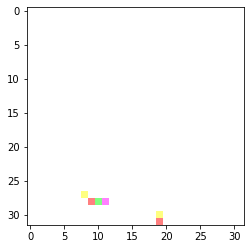

In [0]:
show_image(X[40])

**Model Architecture**

In [0]:
inp = Input(shape=(32, 32, 3))
print('Input :',inp)

Input : Tensor("input_2:0", shape=(None, 32, 32, 3), dtype=float32)


In [0]:
def build_autoencoder():
  #Encoder --------------------------------------------------------->
  # Layer-1
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(inp)
  BatchNormalization(axis=-1)
  x = MaxPooling2D((2, 2), padding='same')(x)
  # Layer-2
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  BatchNormalization(axis=-1)
  encoded = MaxPooling2D((2, 2), padding='same')(x)

  #Decoder --------------------------------------------------------->
  # Layer-1
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
  BatchNormalization(axis=-1)
  x = UpSampling2D((2, 2))(x)
  # Layer-2
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  BatchNormalization(axis=-1)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

  return encoded,decoded

In [0]:
encoder, decoder = build_autoencoder()

In [0]:
autoencoder = Model(inp,decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 16)        0   

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.
x_test /= 255.

In [0]:
print(len(x_train),': Training Sample <--> Testing Sample:',len(x_test))

50000 : Training Sample <--> Testing Sample: 10000


*Training Phase*

In [0]:
history = autoencoder.fit(x_train,x_train, epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
50/50 [==============================] - 169s 3s/step - loss: 0.6276 - val_loss: 0.5900
Epoch 2/50
50/50 [==============================] - 167s 3s/step - loss: 0.5841 - val_loss: 0.5808
Epoch 3/50
50/50 [==============================] - 164s 3s/step - loss: 0.5781 - val_loss: 0.5768
Epoch 4/50
50/50 [==============================] - 173s 3s/step - loss: 0.5750 - val_loss: 0.5742
Epoch 5/50
50/50 [==============================] - 173s 3s/step - loss: 0.5725 - val_loss: 0.5718
Epoch 6/50
50/50 [==============================] - 177s 4s/step - loss: 0.5702 - val_loss: 0.5697
Epoch 7/50
50/50 [==============================] - 173s 3s/step - loss: 0.5682 - val_loss: 0.5683
Epoch 8/50
50/50 [==============================] - 174s 3s/step - loss: 0.5671 - val_loss: 0.5674
Epoch 9/50
50/50 [==============================] - 174s 3s/step - loss: 0.5663 - val_loss: 0.5665
Epoch 10/50
50/50 [==============================] - 175s 4s/step - loss: 0.5656 - val_loss: 0.5663
Epoch 11/

**Plot It !**

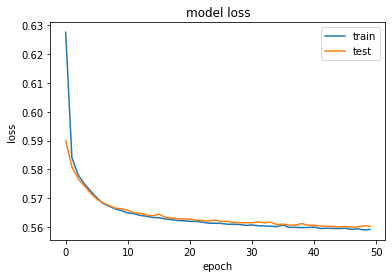

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Prediction and Reconstruction**

In [0]:
decoded_imgs = autoencoder.predict(x_test)

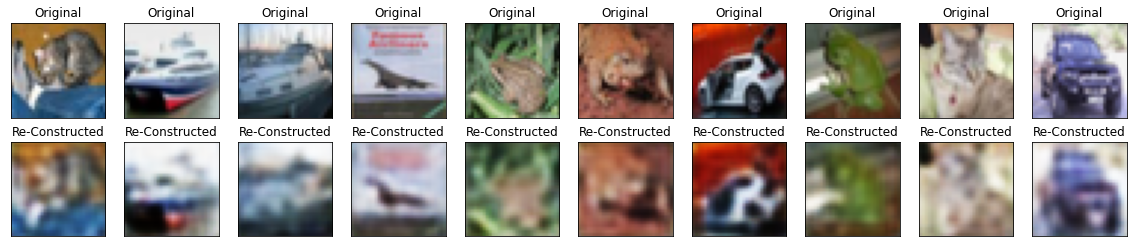

In [0]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    plt.title("Re-Constructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

-- THE END --